<a href="https://colab.research.google.com/github/BathaVamsi/AI-ML-INTERNSHIP/blob/main/blood_donation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',20)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project/Blood donation/Data/transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Checking for NUll Values

In [ ]:
df.shape

(748, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [ ]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

Handling Outliers

<Axes: >

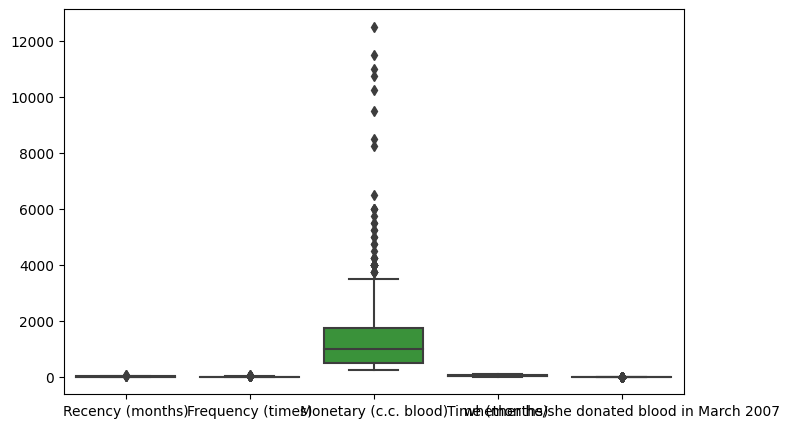

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['Monetary (c.c. blood)'].quantile(0.25)
Q3 = df['Monetary (c.c. blood)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df = df[(df['Monetary (c.c. blood)'] >= lower_bound) & (df['Monetary (c.c. blood)'] <= upper_bound)]

Finding donation rate with high and low factors

In [ ]:
print('chance of donation where donor is having low Recency (months):',df[df['Recency (months)']<3]['whether he/she donated blood in March 2007'].mean())
print('chance of donation where donor is having high Recency (months):',df[df['Recency (months)']>14]['whether he/she donated blood in March 2007'].mean())

print('...................................................................................................................................................')


print('chance of donation where donor is having low Frequency (times):',df[df['Frequency (times)']<3]['whether he/she donated blood in March 2007'].mean())
print('chance of donation where donor is having high Frequency (times):',df[df['Frequency (times)']>6]['whether he/she donated blood in March 2007'].mean())

print('....................................................................................................................................................')

print('chance of donation where donor is having low Monetary (c.c. blood):',df[df['Monetary (c.c. blood)']<500]['whether he/she donated blood in March 2007'].mean())
print('chance of donation where donor is having high Monetary (c.c. blood):',df[df['Monetary (c.c. blood)']>1500]['whether he/she donated blood in March 2007'].mean())

print('........................................................................................................................................................')

print('chance of donation where donor is having low Time (months):',df[df['Time (months)']<14]['whether he/she donated blood in March 2007'].mean())
print('chance of donation where donor is having high Time (months):',df[df['Time (months)']>46]['whether he/she donated blood in March 2007'].mean())

chance of donation where donor is having low Recency (months): 0.35260115606936415
chance of donation where donor is having high Recency (months): 0.07228915662650602
...................................................................................................................................................
chance of donation where donor is having low Frequency (times): 0.14444444444444443
chance of donation where donor is having high Frequency (times): 0.3235294117647059
....................................................................................................................................................
chance of donation where donor is having low Monetary (c.c. blood): 0.12658227848101267
chance of donation where donor is having high Monetary (c.c. blood): 0.3235294117647059
........................................................................................................................................................
chance of donation where donor is havin

In [ ]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,9.645804,4.448080,1112.019915,31.783784,0.224751
std,8.163291,3.391765,847.941140,22.512267,0.417715
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,9.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,74.000000,14.000000,3500.000000,98.000000,1.000000


<Axes: xlabel='whether he/she donated blood in March 2007', ylabel='count'>

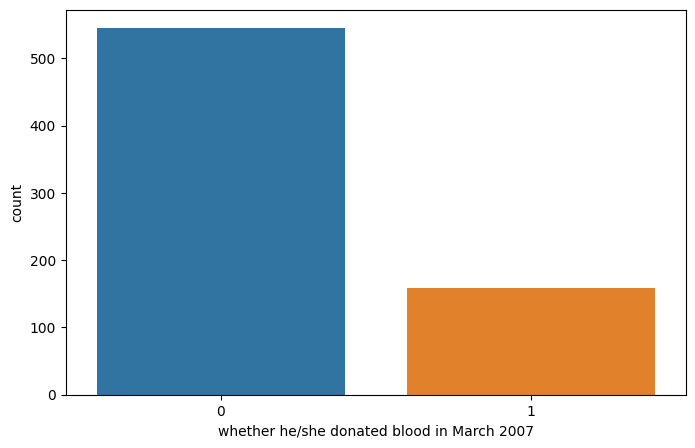

In [ ]:
sns.countplot(x='whether he/she donated blood in March 2007', data=df)

<Axes: xlabel='Monetary (c.c. blood)', ylabel='Time (months)'>

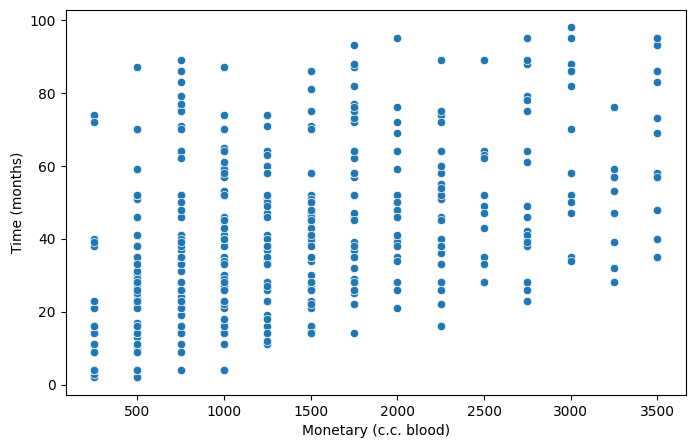

In [ ]:
sns.scatterplot(x=df['Monetary (c.c. blood)'],y=df['Time (months)'])

<Axes: >

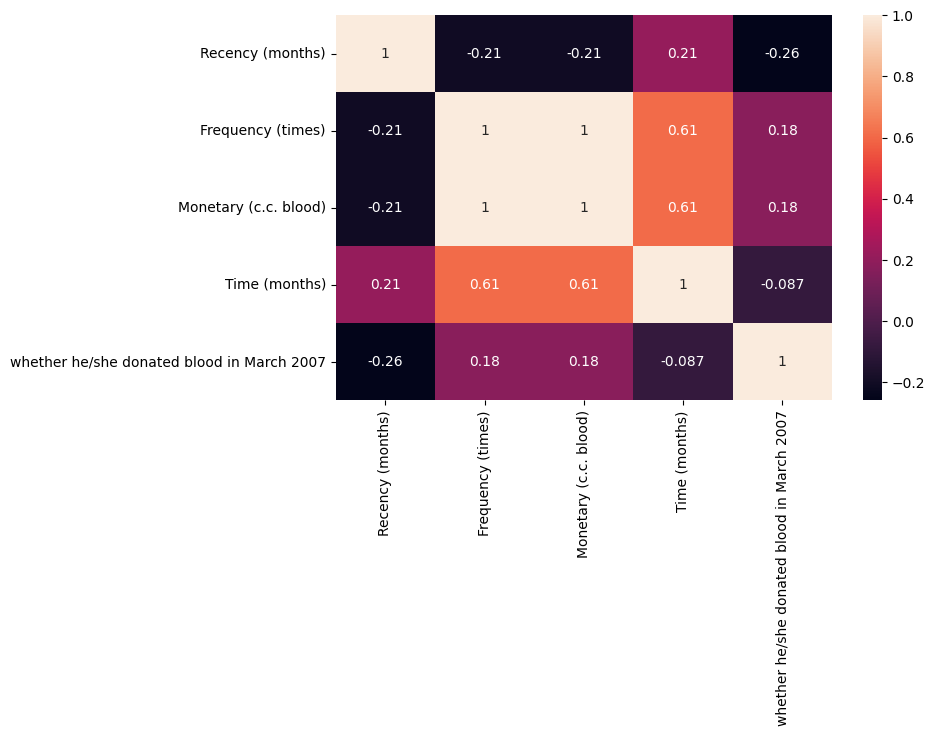

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']

 Splittinng data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

Training The Model In Multiple Algorithms

Logistc Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

LogisticRegression()

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

RandomForestClassifier()

SVM MODEL:

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

TESTING THE MODEL

In [ ]:
prediction=logreg.predict((np.array([[24,3,526,28]])))

print('The Chance of Donation by a Donor for given factors is:',prediction)

The Chance of Donation by a Donor for given factors is: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Testing Model With Multiple Evaluation Metrics

Compare the Model

Random Forest Model:

In [ ]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

68.79432624113475
              precision    recall  f1-score   support

           0       0.73      0.89      0.81       102
           1       0.35      0.15      0.21        39

    accuracy                           0.69       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.63      0.69      0.64       141



Logistic Regression

In [ ]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

68.79432624113475
              precision    recall  f1-score   support

           0       0.73      0.89      0.81       102
           1       0.35      0.15      0.21        39

    accuracy                           0.69       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.63      0.69      0.64       141



Support Vector Model

In [ ]:
# Accuracy of SVM Model
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

74.46808510638297
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       107
           1       0.44      0.24      0.31        34

    accuracy                           0.74       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.71      0.74      0.71       141



SAVE THE BEST MODEL

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg,open('/content/logreg_saved','wb'))

In [ ]:
logreg_loaded = pickle.load(open('/content/logreg_saved','rb'))

In [ ]:
logreg_loaded.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])